In [198]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
cafeData = pd.read_csv('clean_cafe_sales.csv')

In [200]:
cafeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          9977 non-null   float64
 3   Price Per Unit    9994 non-null   float64
 4   Total Spent       9977 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9540 non-null   object 
 8   Valid Date        10000 non-null  bool   
dtypes: bool(1), float64(3), object(5)
memory usage: 634.9+ KB


## Checked data types. Noted that Transaction Date had gone back to an object due to missing values

In [201]:
# Checked which items appeared the most, giving me the fact that Coffee is the most purchased item
cafeData['Item'].value_counts()

Item
Coffee                1291
Salad                 1272
Cookie                1213
Tea                   1207
Juice                 1171
Cake                  1139
Sandwich              1131
Smoothie              1096
Cake, Juice            247
Sandwich, Smoothie     227
No Data                  6
Name: count, dtype: int64

In [202]:
# Table looking at quantity purchased vs Item
pd.crosstab(cafeData["Quantity"], cafeData['Item'])

Item,Cake,"Cake, Juice",Coffee,Cookie,Juice,No Data,Salad,Sandwich,"Sandwich, Smoothie",Smoothie,Tea
Quantity,,,,,,,,,,,
1.0,218,43,256,249,221,0,260,221,39,207,212
2.0,238,50,249,262,244,1,260,218,43,216,275
3.0,209,56,256,211,244,0,229,234,49,220,238
4.0,218,44,243,253,231,2,253,200,48,218,231
5.0,255,54,282,236,228,0,268,254,48,233,250


In [203]:
# Create new date columns if not already done

cafeData['Day of The Week'] = np.nan
cafeData['Transaction Date'] = pd.to_datetime(cafeData['Transaction Date'])
cafeData['Day of The Week'] = cafeData['Transaction Date'].dt.day_name()

cafeData['Month'] = cafeData['Transaction Date'].dt.month_name()
cafeData['Day of Week'] = cafeData['Transaction Date'].dt.day_name()


In [204]:
# Total revenue
total_revenue = cafeData['Total Spent'].sum()

# Average spend per transaction
average_spend = cafeData['Total Spent'].mean()

# Total quantity sold
total_quantity = cafeData['Quantity'].sum()

# Top 5 items sold
top_items = cafeData['Item'].value_counts().head(5)

print("Total Revenue:", total_revenue)
print("Average Spend per Transaction:", average_spend)
print("Total Quantity Sold:", total_quantity)
print("Top 5 Most Sold Items:\n", top_items)

Total Revenue: 89096.0
Average Spend per Transaction: 8.930139320437005
Total Quantity Sold: 30180.0
Top 5 Most Sold Items:
 Item
Coffee    1291
Salad     1272
Cookie    1213
Tea       1207
Juice     1171
Name: count, dtype: int64


In [205]:
cafeData['Is Weekend'] = cafeData['Day of Week'].isin(['Saturday', 'Sunday'])

weekend_stats = cafeData.groupby('Is Weekend')['Total Spent'].agg(
    Total_Revenue='sum',
    Avg_Spent='mean',
    Transaction_Count='count'
)

print("Weekend vs Weekday Performance:\n", weekend_stats)


Weekend vs Weekday Performance:
             Total_Revenue  Avg_Spent  Transaction_Count
Is Weekend                                             
False             64769.0   8.939821               7245
True              24327.0   8.904466               2732


In [206]:
item_quantity = cafeData.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
item_revenue = cafeData.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

print("Total Quantity Sold by Item:\n", item_quantity.head(10))
print("\nTotal Revenue by Item:\n", item_revenue.head(10))


Total Quantity Sold by Item:
 Item
Coffee                3904.0
Salad                 3819.0
Tea                   3650.0
Cookie                3598.0
Juice                 3505.0
Cake                  3468.0
Sandwich              3429.0
Smoothie              3336.0
Cake, Juice            757.0
Sandwich, Smoothie     704.0
Name: Quantity, dtype: float64

Total Revenue by Item:
 Item
Salad                 19095.0
Sandwich              13716.0
Smoothie              13344.0
Juice                 10515.0
Cake                  10404.0
Coffee                 7808.0
Tea                    5475.0
Cookie                 3598.0
Sandwich, Smoothie     2816.0
Cake, Juice            2271.0
Name: Total Spent, dtype: float64


In [207]:
payment_stats = cafeData.groupby('Payment Method')['Total Spent'].agg(
    Total_Revenue='sum',
    Avg_Spent='mean',
    Transaction_Count='count'
).sort_values(by='Total_Revenue', ascending=False)

print("Payment Method Analysis:\n", payment_stats)


Payment Method Analysis:
                 Total_Revenue  Avg_Spent  Transaction_Count
Payment Method                                             
Credit Card           20466.0   9.019833               2269
Digital Wallet        20414.0   8.933917               2285
Cash                  20402.5   9.051686               2254
ERROR                  2655.5   8.706557                305
UNKNOWN                2502.5   8.540956                293


In [208]:
combined = cafeData.groupby(['Month', 'Day of Week'])['Total Spent'].agg(
    Total_Revenue='sum',
    Avg_Spent='mean',
    Transaction_Count='count'
).sort_values(by='Total_Revenue', ascending=False)

print("Most Profitable Times by Month & Day:\n", combined.head(10))


Most Profitable Times by Month & Day:
                       Total_Revenue  Avg_Spent  Transaction_Count
Month    Day of Week                                             
June     Friday              1470.5   8.966463                164
April    Sunday              1377.5   9.183333                150
June     Thursday            1346.5   9.757246                138
March    Thursday            1302.0   9.041667                144
July     Monday              1276.0   9.179856                139
December Saturday            1260.5   9.134058                138
October  Sunday              1259.5   8.932624                141
August   Wednesday           1259.0   9.537879                132
October  Tuesday             1245.5   9.580769                130
December Sunday              1242.5   9.272388                134


In [209]:
# 1. Items with highest average transaction spend
avg_spend_per_item = cafeData.groupby('Item')['Total Spent'].mean().sort_values(ascending=False)
print("Avg Spend per Transaction by Item:\n", avg_spend_per_item.head(5))

# 2. Ideal payment method (highest avg spend)
ideal_payment = cafeData.groupby('Payment Method')['Total Spent'].mean().sort_values(ascending=False)
print("\nAvg Spend by Payment Method:\n", ideal_payment)

# 3. Top 5 high-ticket transactions
top_transactions = cafeData.sort_values('Total Spent', ascending=False).head(5)
print("\nTop 5 Highest-Spend Transactions:\n", top_transactions[['Transaction ID', 'Item', 'Total Spent']])


Avg Spend per Transaction by Item:
 Item
No Data               18.000000
Salad                 15.035433
Sandwich, Smoothie    12.405286
Smoothie              12.197441
Sandwich              12.170364
Name: Total Spent, dtype: float64

Avg Spend by Payment Method:
 Payment Method
Cash              9.051686
Credit Card       9.019833
Digital Wallet    8.933917
ERROR             8.706557
UNKNOWN           8.540956
Name: Total Spent, dtype: float64

Top 5 Highest-Spend Transactions:
      Transaction ID   Item  Total Spent
7223    TXN_7568112  Salad         25.0
3180    TXN_3711712  Salad         25.0
7272    TXN_2536821  Salad         25.0
7278    TXN_4496616  Salad         25.0
7284    TXN_8942829  Salad         25.0


/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_18231/1721856422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="YlOrBr")


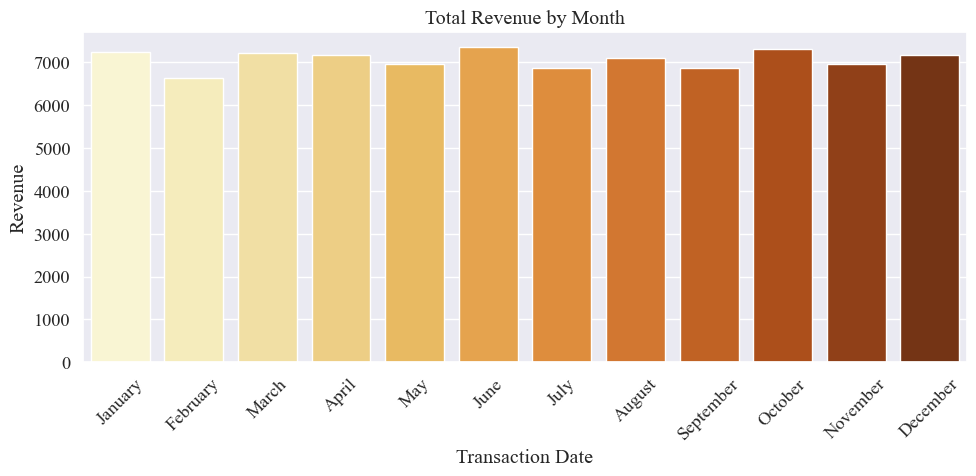

In [210]:
# Drop rows with invalid dates
valid_dates = cafeData.dropna(subset=['Transaction Date'])

# Monthly revenue
monthly_revenue = valid_dates.groupby(valid_dates['Transaction Date'].dt.month_name())['Total Spent'].sum()
monthly_revenue = monthly_revenue.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
sns.set_theme(font="Times New Roman", font_scale=1.2)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="YlOrBr")
plt.title("Total Revenue by Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_18231/1721856422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="YlOrBr")


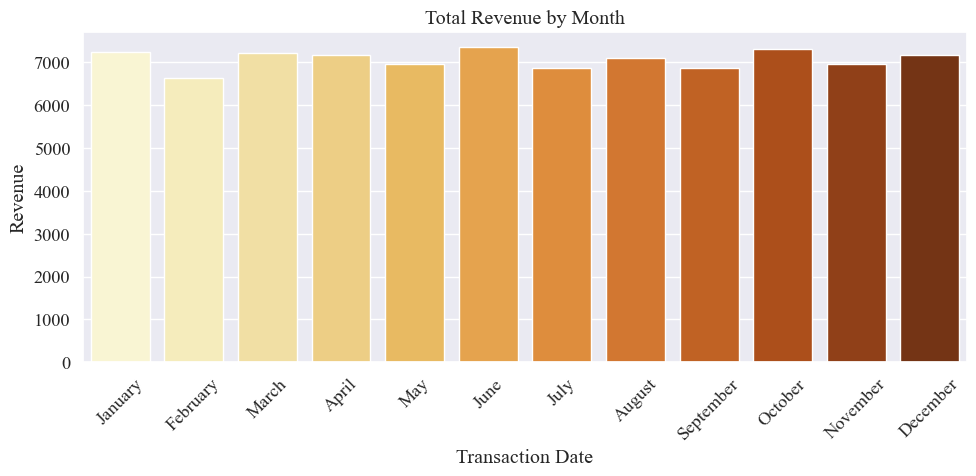

In [211]:
# Drop rows with invalid dates
valid_dates = cafeData.dropna(subset=['Transaction Date'])

# Monthly revenue
monthly_revenue = valid_dates.groupby(valid_dates['Transaction Date'].dt.month_name())['Total Spent'].sum()
monthly_revenue = monthly_revenue.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
sns.set_theme(font="Times New Roman", font_scale=1.2)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="YlOrBr")
plt.title("Total Revenue by Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


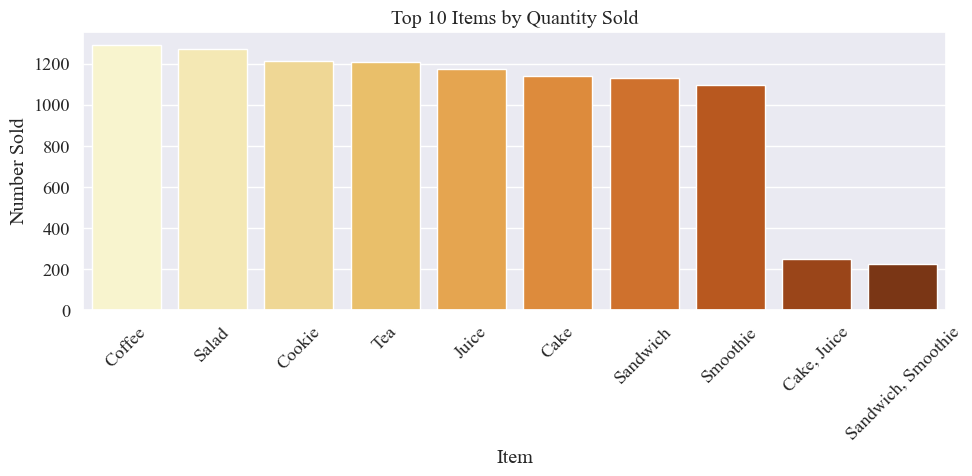

In [212]:
top_items = cafeData['Item'].value_counts().head(10).reset_index()
top_items.columns = ['Item', 'Count']

plt.figure(figsize=(10, 5))
sns.set_theme(font="Times New Roman", font_scale=1.2)
sns.barplot(data=top_items, x='Item', y='Count', hue='Item', palette='YlOrBr', legend=False)
plt.title("Top 10 Items by Quantity Sold")
plt.ylabel("Number Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/_z/410cfm6x4fl_4m_6s41fnf4w0000gp/T/ipykernel_18231/3757068623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette="YlOrBr")


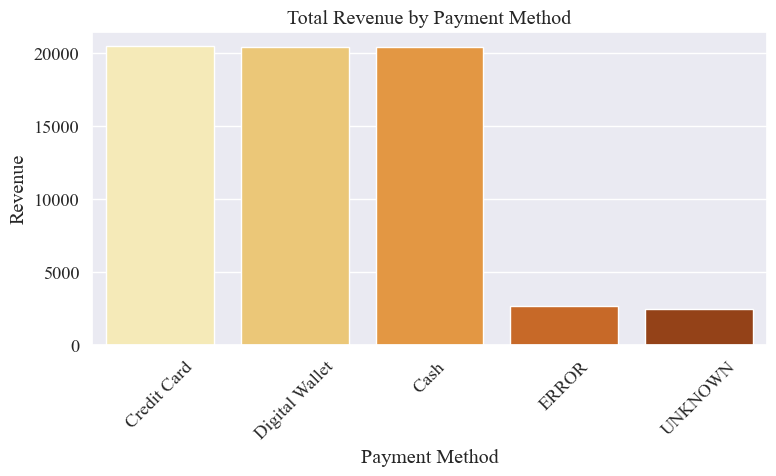

In [213]:
payment_revenue = cafeData.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.set_theme(font="Times New Roman", font_scale=1.2)
sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette="YlOrBr")
plt.title("Total Revenue by Payment Method")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
